In [1]:
import sys
sys.path.append('../')
from read_data_functions import *
from plot_functions import *
from calculations import *
plt.style.use('../Style.mplstyle')
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # suppress warnings

In [2]:
path = '../../../Data/2025/250929-251003_Ulva/PTR-MS'
data = import_PTRMS(path, '', '29/09/2025 08:03:26')
data = data['Peaks of interest_Abst Time']

raw_keys = []
conc_keys = []
for key in data.keys():
    if 'Raw' in key:
        raw_keys.append(key)
    if 'Conc' in key:
        conc_keys.append(key)

display(data)
print(data.keys(), len(raw_keys), len(conc_keys))

,AbsTime,RelTime,Cycle,CycleInFile,m63.026 (C[12]2H[1]7S[32]1) (Raw),m123.117 (C[12]9H[1]15) (Raw),m137.133 (C[12]10H[1]17) (Raw),m151.148 (C[12]11H[1]19) (Raw),m153.914 (C[12]1H[1]1N[14]1I[127]1) (Raw),m172.842 (C[12]1H[1]1Br[79]1Br[81]1) (Raw),...,m63.026 (C[12]2H[1]7S[32]1) (Conc),m123.117 (C[12]9H[1]15) (Conc),m137.133 (C[12]10H[1]17) (Conc),m151.148 (C[12]11H[1]19) (Conc),m153.914 (C[12]1H[1]1N[14]1I[127]1) (Conc),m172.842 (C[12]1H[1]1Br[79]1Br[81]1) (Conc),m218.828 (C[12]1H[1]1Br[79]1I[127]1) (Conc),m266.812 (C[12]1H[1]1I[127]2) (Conc),Filename,Time
0,45929.33578,0.000000,1,1,7.13,3.67,4.68,1.38,0.525,0.16500,...,0.00921,0.00306,0.00381,0.00114,0.000389,0.000244,0.000581,0.000441,Data_08_03_26.h5,2025-09-29 08:03:26.000000000
1,45929.33584,4.999832,2,2,7.31,7.03,6.59,2.72,0.390,0.35400,...,0.00942,0.00584,0.00536,0.00224,0.000288,0.000522,0.000000,0.000549,Data_08_03_26.h5,2025-09-29 08:03:30.999831676
2,45929.33590,9.999664,3,3,5.57,6.85,3.70,1.84,0.426,0.00114,...,0.00703,0.00558,0.00294,0.00148,0.000309,0.000002,0.001560,0.000228,Data_08_03_26.h5,2025-09-29 08:03:35.999663830
3,45929.33596,14.999496,4,4,4.51,3.58,2.96,2.59,0.044,0.23100,...,0.00563,0.00289,0.00233,0.00207,0.000031,0.000330,0.001030,0.000008,Data_08_03_26.h5,2025-09-29 08:03:40.999495510
4,45929.33601,19.999328,5,5,6.51,6.11,5.45,2.02,0.000,0.00395,...,0.00823,0.00499,0.00435,0.00163,0.000000,0.000006,0.000531,0.000210,Data_08_03_26.h5,2025-09-29 08:03:45.999327660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42253,45933.79396,385186.216800,42254,7788,1.50,15.60,80.50,13.00,0.474,0.88700,...,0.00237,0.01590,0.08010,0.01310,0.000429,0.001600,0.002940,0.000416,Data_08_16_01.h5,2025-10-03 19:03:12.216800000
42254,45933.79401,385191.216600,42255,7789,2.84,16.10,83.40,12.40,1.190,1.02000,...,0.00434,0.01590,0.08050,0.01210,0.001040,0.001790,0.002370,0.000593,Data_08_16_01.h5,2025-10-03 19:03:17.216600000
42255,45933.79407,385196.216500,42256,7790,1.53,15.70,85.40,15.80,1.020,1.56000,...,0.00234,0.01550,0.08210,0.01540,0.000895,0.002720,0.002220,0.000376,Data_08_16_01.h5,2025-10-03 19:03:22.216500000
42256,45933.79413,385201.216300,42257,7791,3.09,19.80,77.40,13.50,0.411,1.04000,...,0.00480,0.01990,0.07600,0.01340,0.000366,0.001850,0.002090,0.001810,Data_08_16_01.h5,2025-10-03 19:03:27.216300000


Index(['AbsTime', 'RelTime', 'Cycle', 'CycleInFile',
       'm63.026 (C[12]2H[1]7S[32]1) (Raw)', 'm123.117 (C[12]9H[1]15) (Raw)',
       'm137.133 (C[12]10H[1]17) (Raw)', 'm151.148 (C[12]11H[1]19) (Raw)',
       'm153.914 (C[12]1H[1]1N[14]1I[127]1) (Raw)',
       'm172.842 (C[12]1H[1]1Br[79]1Br[81]1) (Raw)',
       'm218.828 (C[12]1H[1]1Br[79]1I[127]1) (Raw)',
       'm266.812 (C[12]1H[1]1I[127]2) (Raw)',
       'm63.026 (C[12]2H[1]7S[32]1) (Conc)', 'm123.117 (C[12]9H[1]15) (Conc)',
       'm137.133 (C[12]10H[1]17) (Conc)', 'm151.148 (C[12]11H[1]19) (Conc)',
       'm153.914 (C[12]1H[1]1N[14]1I[127]1) (Conc)',
       'm172.842 (C[12]1H[1]1Br[79]1Br[81]1) (Conc)',
       'm218.828 (C[12]1H[1]1Br[79]1I[127]1) (Conc)',
       'm266.812 (C[12]1H[1]1I[127]2) (Conc)', 'Filename', 'Time'],
      dtype='object') 8 8


In [3]:
def exp_mean(df, df_keys, timestamps):
    new_df = pd.DataFrame()
    for row in timestamps:
        data = time_filtered_conc(df, df_keys, row)
        new_df = pd.concat([new_df, data], ignore_index = True)

    mean = np.zeros(len(df_keys))
    std = np.zeros(len(df_keys))
    for i, key in enumerate(df_keys):
        mean[i] += np.array(new_df[key]).mean()
        std[i] += np.array(new_df[key]).std()

    return mean, std

def plot_barchart(axes, means, stds, xticks, ax_label):
    n_lines = len(xticks)
    cmap = mpl.colormaps['viridis']
    colors = cmap(np.linspace(0, 1, n_lines))

    for ax, key in zip(axes, means.keys()):
        ax.bar(xticks, means[key], yerr = stds[key], color = colors)
        ax.set_ylabel(ax_label)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, ha = 'left')
        ax.tick_params(axis = 'x', which = 'minor', bottom = False)

    return

In [7]:
compounds = [r'C$_{2}$H$_{7}$S$^{+}$', r'C$_{9}$H$_{15}^{+}$', r'C$_{10}$H$_{17}^{+}$', r'C$_{11}$H$_{19}^{+}$', 
             r'CHNI$^{+}$', r'CHBr$_{2}^{+}$', r'CHBrI$^{+}$', r'CHI$_{2}^{+}$']
P_conc = [r'0.02 $\mu$M', r'0.7 $\mu$M', r'3.9 $\mu$M', r'19 $\mu$M']

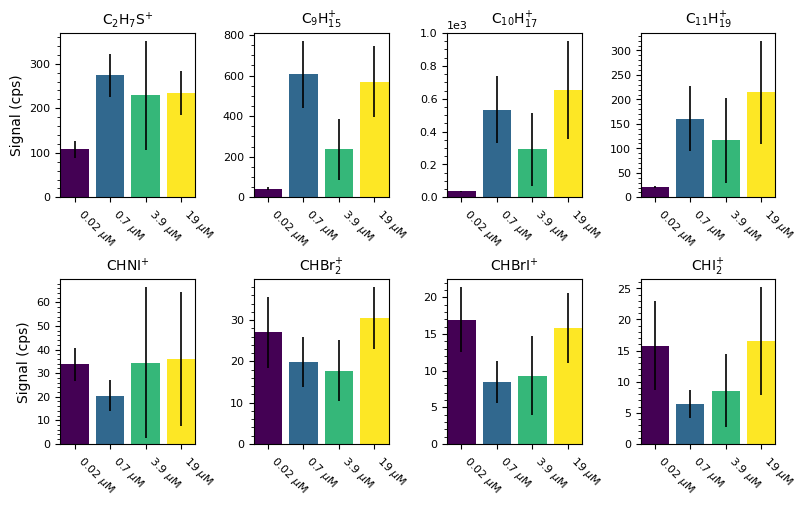

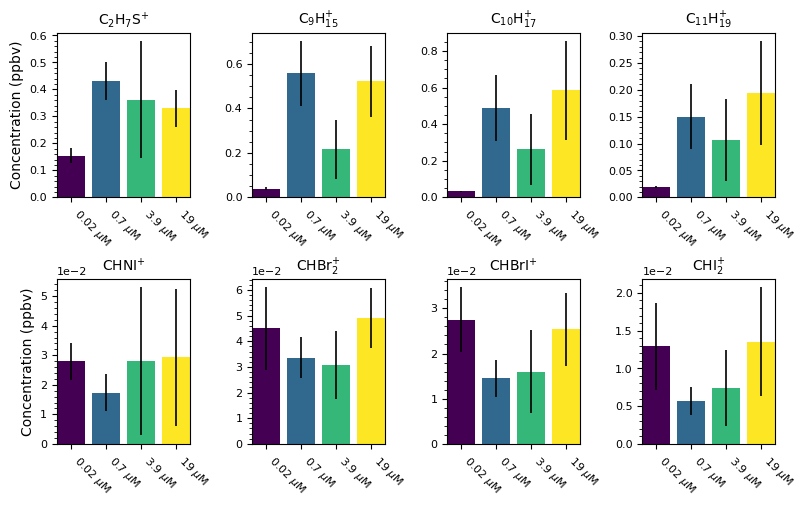

In [12]:
P002_timestamps = [['2025-09-30 12:39', '2025-09-30 14:38'],
                   ['2025-10-02 16:51', '2025-10-02 18:57']]
P002_raw_mean, P002_raw_std = exp_mean(data, raw_keys, P002_timestamps)
P002_conc_mean, P002_conc_std = exp_mean(data, conc_keys, P002_timestamps)
P07_timestamps = [['2025-10-01 15:47', '2025-10-01 17:49'],
                  ['2025-10-03 10:00', '2025-10-03 12:03']]
P07_raw_mean, P07_raw_std = exp_mean(data, raw_keys, P07_timestamps)
P07_conc_mean, P07_conc_std = exp_mean(data, conc_keys, P07_timestamps)
P39_timestamps = [['2025-09-29 17:10', '2025-09-29 19:11'],
                  ['2025-10-01 09:32', '2025-10-01 11:31'],
                  ['2025-10-02 13:23', '2025-10-02 15:27']]
P39_raw_mean, P39_raw_std = exp_mean(data, raw_keys, P39_timestamps)
P39_conc_mean, P39_conc_std = exp_mean(data, conc_keys, P39_timestamps)
P19_timestamps = [['2025-09-30 16:14', '2025-09-30 18:14'],     # Start time may not be correct, ask Clement for lab notes.
                  ['2025-10-02 09:51', '2025-10-02 12:06'],
                  ['2025-10-03 13:17', '2025-10-03 15:17']]
P19_raw_mean, P19_raw_std = exp_mean(data, raw_keys, P19_timestamps)
P19_conc_mean, P19_conc_std = exp_mean(data, conc_keys, P19_timestamps)

raw_mean_bubling = pd.DataFrame({'P002': P002_raw_mean, 'P07': P07_raw_mean, 'P39': P39_raw_mean, 'P19': P19_raw_mean}).T
raw_mean_bubling.columns = ['C2H7S', 'C9H15', 'C10H17', 'C11H19', 'CHNI', 'CHBr2', 'CHBrI', 'CHI2']
raw_std_bubling = pd.DataFrame({'P002': P002_raw_std, 'P07': P07_raw_std, 'P39': P39_raw_std, 'P19': P19_raw_std}).T
raw_std_bubling.columns = ['C2H7S', 'C9H15', 'C10H17', 'C11H19', 'CHNI', 'CHBr2', 'CHBrI', 'CHI2']
conc_mean_bubling = pd.DataFrame({'P002': P002_conc_mean, 'P07': P07_conc_mean, 'P39': P39_conc_mean, 'P19': P19_conc_mean}).T
conc_mean_bubling.columns = ['C2H7S', 'C9H15', 'C10H17', 'C11H19', 'CHNI', 'CHBr2', 'CHBrI', 'CHI2']
conc_std_bubling = pd.DataFrame({'P002': P002_conc_std, 'P07': P07_conc_std, 'P39': P39_conc_std, 'P19': P19_conc_std}).T
conc_std_bubling.columns = ['C2H7S', 'C9H15', 'C10H17', 'C11H19', 'CHNI', 'CHBr2', 'CHBrI', 'CHI2']

fig1, axes1 = plt.subplots(2, 4, figsize = (8, 5))      # plt.subplots(1, 8, figsize = (15, 2.5))
plot_barchart(axes1.flatten(), raw_mean_bubling, raw_std_bubling, P_conc, None)
axes1[0][0].set_ylabel('Signal (cps)')
axes1[1][0].set_ylabel('Signal (cps)')
for ax, compound in zip(axes1.flatten(), compounds):
    ax.set_ylim(bottom = 0)
    ax.set_title(compound, fontsize = 10)
fig1.tight_layout(pad = 0.5)
fig1.savefig('Ulva_bubling_preliminary.jpg', dpi = 1000)

fig2, axes2 = plt.subplots(2, 4, figsize = (8, 5))
plot_barchart(axes2.flatten(), conc_mean_bubling, conc_std_bubling, P_conc, None)
axes2[0][0].set_ylabel('Concentration (ppbv)')
axes2[1][0].set_ylabel('Concentration (ppbv)')
for ax, compound in zip(axes2.flatten(), compounds):
    ax.set_ylim(bottom = 0)
    ax.set_title(compound, fontsize = 10)
fig2.tight_layout(pad = 0.5)

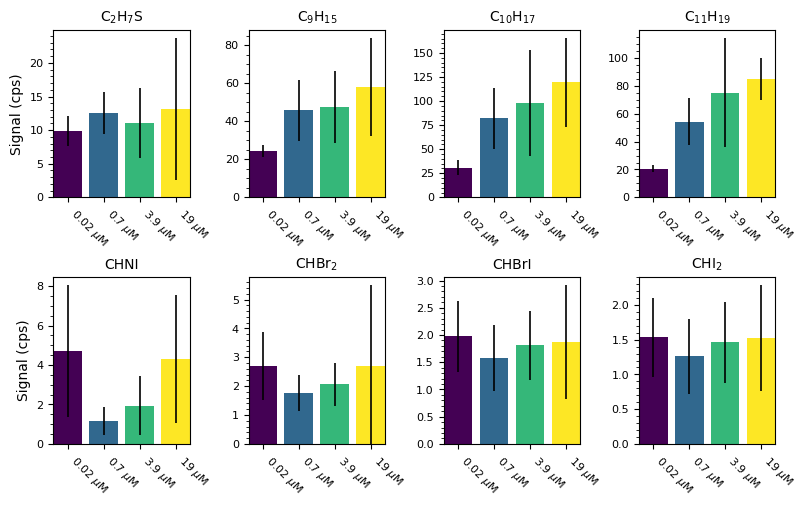

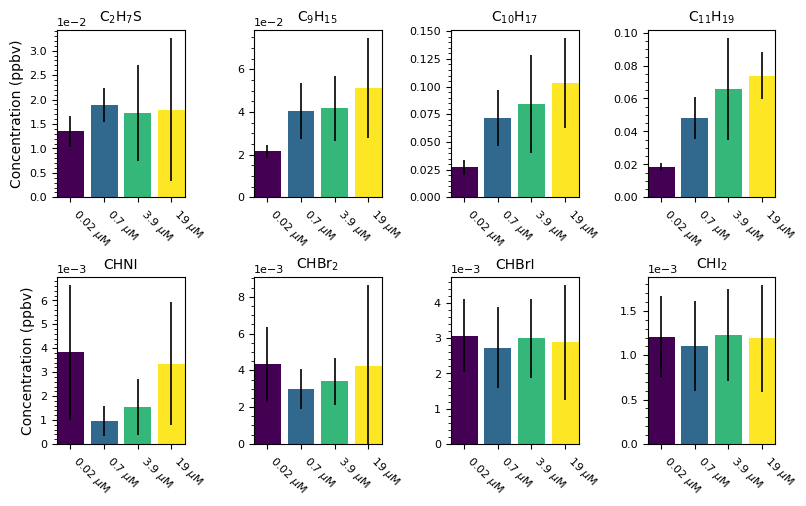

In [6]:
P002_timestamps = [['2025-09-30 12:08', '2025-09-30 12:39'],
                   ['2025-10-02 16:21', '2025-10-02 16:51']]
P002_raw_mean, P002_raw_std = exp_mean(data, raw_keys, P002_timestamps)
P002_conc_mean, P002_conc_std = exp_mean(data, conc_keys, P002_timestamps)
P07_timestamps = [['2025-10-01 15:16', '2025-10-01 15:47'],
                  ['2025-10-03 09:32', '2025-10-03 10:00']]
P07_raw_mean, P07_raw_std = exp_mean(data, raw_keys, P07_timestamps)
P07_conc_mean, P07_conc_std = exp_mean(data, conc_keys, P07_timestamps)
P39_timestamps = [['2025-09-29 16:38', '2025-09-29 17:10'],
                  ['2025-10-01 09:02', '2025-10-01 09:32'],
                  ['2025-10-02 12:53', '2025-10-02 13:23']]
P39_raw_mean, P39_raw_std = exp_mean(data, raw_keys, P39_timestamps)
P39_conc_mean, P39_conc_std = exp_mean(data, conc_keys, P39_timestamps)
P19_timestamps = [['2025-09-30 15:41', '2025-09-30 16:14'],     # End time may not be correct, ask Clement for lab notes.
                  ['2025-10-02 09:21', '2025-10-02 09:51'],
                  ['2025-10-03 12:45', '2025-10-03 13:17']]
P19_raw_mean, P19_raw_std = exp_mean(data, raw_keys, P19_timestamps)
P19_conc_mean, P19_conc_std = exp_mean(data, conc_keys, P19_timestamps)

raw_mean = pd.DataFrame({'P002': P002_raw_mean, 'P07': P07_raw_mean, 'P39': P39_raw_mean, 'P19': P19_raw_mean}).T
raw_mean.columns = ['C2H7S', 'C9H15', 'C10H17', 'C11H19', 'CHNI', 'CHBr2', 'CHBrI', 'CHI2']
raw_std = pd.DataFrame({'P002': P002_raw_std, 'P07': P07_raw_std, 'P39': P39_raw_std, 'P19': P19_raw_std}).T
raw_std.columns = ['C2H7S', 'C9H15', 'C10H17', 'C11H19', 'CHNI', 'CHBr2', 'CHBrI', 'CHI2']
conc_mean = pd.DataFrame({'P002': P002_conc_mean, 'P07': P07_conc_mean, 'P39': P39_conc_mean, 'P19': P19_conc_mean}).T
conc_mean.columns = ['C2H7S', 'C9H15', 'C10H17', 'C11H19', 'CHNI', 'CHBr2', 'CHBrI', 'CHI2']
conc_std = pd.DataFrame({'P002': P002_conc_std, 'P07': P07_conc_std, 'P39': P39_conc_std, 'P19': P19_conc_std}).T
conc_std.columns = ['C2H7S', 'C9H15', 'C10H17', 'C11H19', 'CHNI', 'CHBr2', 'CHBrI', 'CHI2']

fig1, axes1 = plt.subplots(2, 4, figsize = (8, 5))
plot_barchart(axes1.flatten(), raw_mean, raw_std, P_conc, None)
axes1[0][0].set_ylabel('Signal (cps)')
axes1[1][0].set_ylabel('Signal (cps)')
for ax, compound in zip(axes1.flatten(), compounds):
    ax.set_ylim(bottom = 0)
    ax.set_title(compound, fontsize = 10)
fig1.tight_layout(pad = 0.5)
fig1.savefig('Ulva_before_bubling_preliminary.jpg', dpi = 1000)

fig2, axes2 = plt.subplots(2, 4, figsize = (8, 5))
plot_barchart(axes2.flatten(), conc_mean, conc_std, P_conc, None)
axes2[0][0].set_ylabel('Concentration (ppbv)')
axes2[1][0].set_ylabel('Concentration (ppbv)')
for ax, compound in zip(axes2.flatten(), compounds):
    ax.set_ylim(bottom = 0)
    ax.set_title(compound, fontsize = 10)
fig2.tight_layout(pad = 0.5)